# Simple demo for using supracentrality Python code

### Dane Taylor, 4 January 2021


In [1]:
%pylab inline
import networkx as nx
#import seaborn as sns
from scipy import sparse
import sys,os

Populating the interactive namespace from numpy and matplotlib


## 1. Set up folders for code and figures

In [2]:
# folder containing supracentrality codes
code_folder = '../supracentrality/' 
sys.path.append(code_folder)

# folder where to save figures
fig_folder = 'figs' 
if os.path.isdir(fig_folder)==False: os.mkdir(fig_folder) 

In [3]:
from supracentrality import *

## 2. Load a simple multiplex network with N=4 nodes and T=6 layers

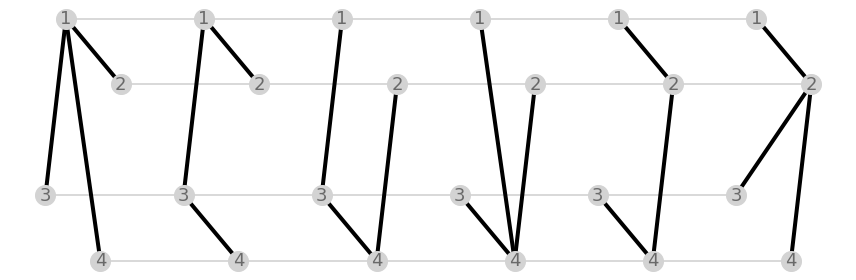

In [4]:
graph = get_toy1()
f1,ax = visualize_toy1(graph)
plt.savefig(fig_folder+'/toy1_visual.pdf')

In [5]:
graph['As']

[array([[0, 1, 1, 1],
        [1, 0, 0, 0],
        [1, 0, 0, 0],
        [1, 0, 0, 0]]),
 array([[0, 1, 1, 0],
        [1, 0, 0, 0],
        [1, 0, 0, 1],
        [0, 0, 1, 0]]),
 array([[0, 0, 1, 0],
        [0, 0, 0, 1],
        [1, 0, 0, 1],
        [0, 1, 1, 0]]),
 array([[0, 0, 0, 1],
        [0, 0, 0, 1],
        [0, 0, 0, 1],
        [1, 1, 1, 0]]),
 array([[0, 1, 0, 0],
        [1, 0, 0, 1],
        [0, 0, 0, 1],
        [0, 1, 1, 0]]),
 array([[0, 1, 0, 0],
        [1, 0, 1, 1],
        [0, 1, 0, 0],
        [0, 1, 0, 0]])]

## 3. Study supracentrality when layers coupled by undirected chain

In [44]:
M = [sparse.csr_matrix(A) for A in graph['As']] # adjacency matrices must be sparse
At = undirected_chain(len(M))
omega = 1 # interlayer coupling strength

In [48]:
#for the centrality matrix, use the Google matrix transpose
centrality_matrix_type = 'pagerank' # or adjacency, or hub, authority

if centrality_matrix_type == 'adjacency':
    centrality_function = lambda A: A.todense()
    
if centrality_matrix_type == 'pagerank':
    centrality_function = lambda A: google_matrix(A,alpha=0.85).T

if centrality_matrix_type == 'hub':
    centrality_function = lambda A: np.dot(A.todense(),A.todense().T)

if centrality_matrix_type == 'authority':
    centrality_function = lambda A: np.dot(A.todense().T,A.todense())


centrality_function(M[1])

array([[0.038, 0.887, 0.463, 0.038],
       [0.463, 0.038, 0.038, 0.038],
       [0.463, 0.038, 0.038, 0.887],
       [0.038, 0.038, 0.463, 0.038]])

In [49]:
joints = supraCentrality(M,At,omega,centrality_function)
np.set_printoptions(precision=3)
print('joint centralities:')
print(joints)

joint centralities:
[[0.037 0.049 0.044 0.038 0.029 0.016]
 [0.016 0.03  0.041 0.045 0.05  0.038]
 [0.025 0.055 0.064 0.048 0.035 0.018]
 [0.021 0.045 0.074 0.092 0.063 0.028]]


In [50]:
marginals,conditionals = get_marginal_and_conditional(joints)
print('conditional centralities:')
print(conditionals)

conditional centralities:
[[0.378 0.274 0.197 0.172 0.164 0.158]
 [0.16  0.168 0.184 0.201 0.282 0.382]
 [0.25  0.308 0.288 0.215 0.198 0.18 ]
 [0.212 0.25  0.331 0.412 0.355 0.28 ]]


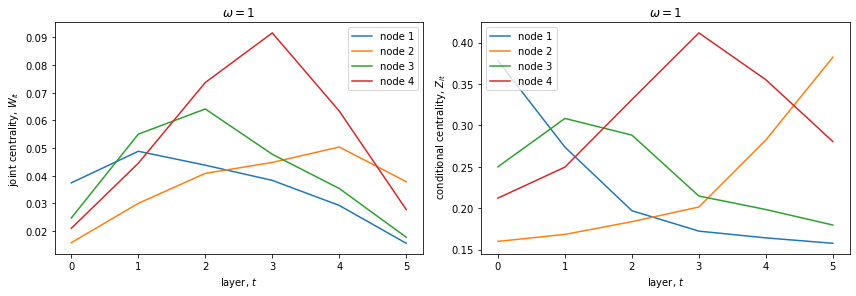

In [51]:
f1,ax = plot_joint_conditional_centralities(joints,conditionals)
ax[0].set_title('$\omega='+str(omega)+'$')
ax[1].set_title('$\omega='+str(omega)+'$')
plt.savefig(fig_folder+'/joints_conditionals_undirected.pdf')

### Increase $\omega$ and study effects

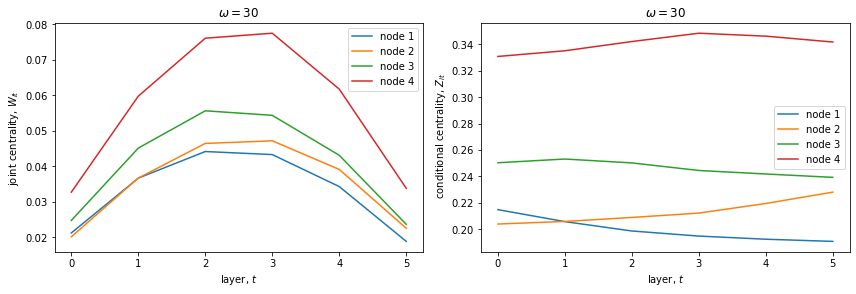

In [52]:
omega = 30 # interlayer coupling strength
joints = supraCentrality(M,At,omega,centrality_function)
marginals,conditionals = get_marginal_and_conditional(joints)

f1,ax = plot_joint_conditional_centralities(joints,conditionals)
ax[0].set_title('$\omega='+str(omega)+'$')
ax[1].set_title('$\omega='+str(omega)+'$')
plt.savefig(fig_folder+'/joints_conditionals_undirected_large_w.pdf')

### Decrease $\omega$ and study effects

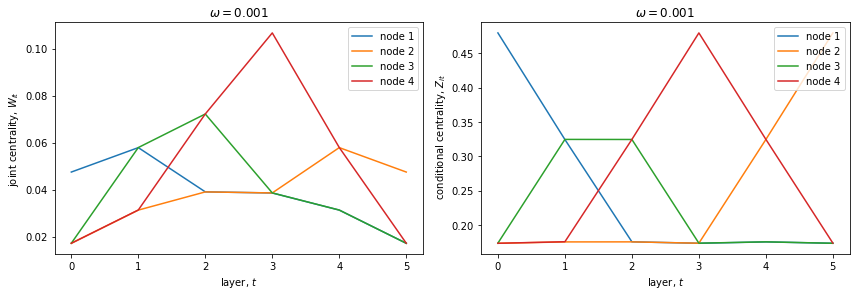

In [53]:
omega = .001 # interlayer coupling strength
joints = supraCentrality(M,At,omega,centrality_function)
marginals,conditionals = get_marginal_and_conditional(joints)

f1,ax = plot_joint_conditional_centralities(joints,conditionals)
ax[0].set_title('$\omega='+str(omega)+'$')
ax[1].set_title('$\omega='+str(omega)+'$')
plt.savefig(fig_folder+'/joints_conditionals_undirected_small_w.pdf')

## Now couple layers with directed edges (first layer most important)

In [54]:
omega = 1 # again, set the interlayer coupling strength to 1
gamma = .1 # layer teleportation parameter as described in https://arxiv.org/pdf/1906.06366.pdf
At2 = directed_chain(len(M),gamma) # interlayer adjacency matrix is directed

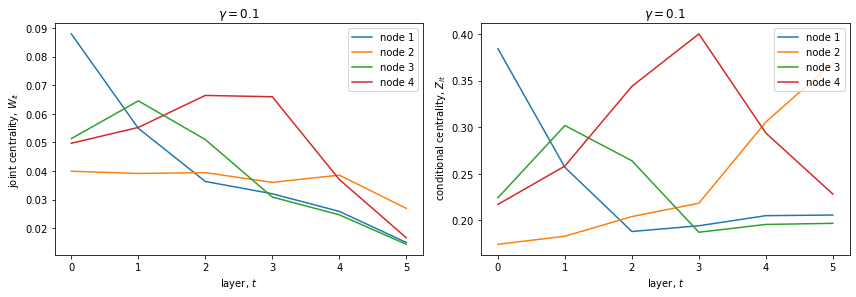

In [55]:
joints2 = supraCentrality(M,At2,omega,centrality_function)
marginals2,conditionals2 = get_marginal_and_conditional(joints2)
f1,ax = plot_joint_conditional_centralities(joints2,conditionals2)
ax[0].set_title('$\gamma='+str(gamma)+'$')
ax[1].set_title('$\gamma='+str(gamma)+'$')

plt.savefig(fig_folder+'/joints_conditionals_directed.pdf')

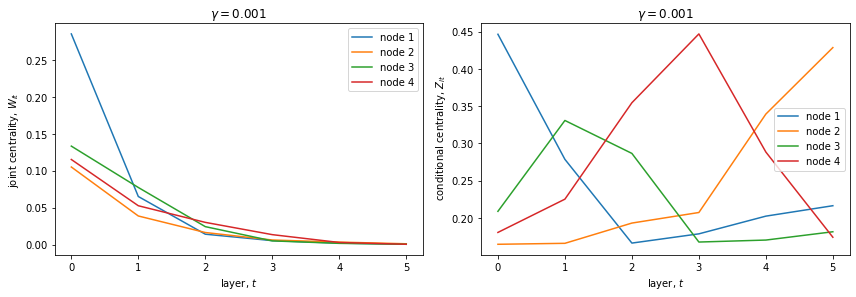

In [56]:
gamma = .001
At2 = directed_chain(len(M),gamma)

joints2 = supraCentrality(M,At2,omega,centrality_function)
marginals2,conditionals2 = get_marginal_and_conditional(joints2)
f1,ax = plot_joint_conditional_centralities(joints2,conditionals2)
ax[0].set_title('$\gamma='+str(gamma)+'$')
ax[1].set_title('$\gamma='+str(gamma)+'$')

plt.savefig(fig_folder+'/joints_conditionals_directed_small_gamma.pdf')

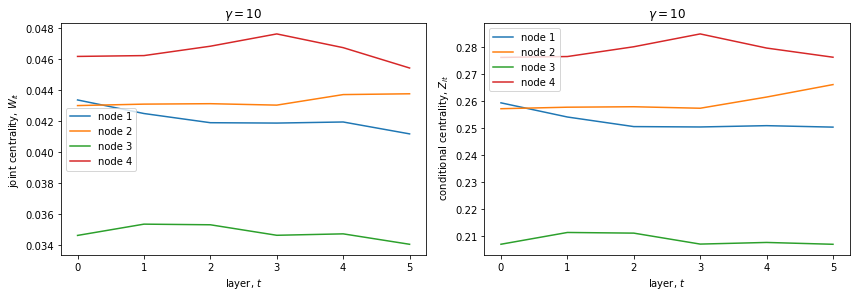

In [57]:
gamma = 10
At2 = directed_chain(len(M),gamma)

joints2 = supraCentrality(M,At2,omega,centrality_function)
marginals2,conditionals2 = get_marginal_and_conditional(joints2)
f1,ax = plot_joint_conditional_centralities(joints2,conditionals2)
ax[0].set_title('$\gamma='+str(gamma)+'$')
ax[1].set_title('$\gamma='+str(gamma)+'$')

plt.savefig(fig_folder+'/joints_conditionals_directed_large_gamma.pdf')

## Reverse the direction of interlayer coupling  (last layer most important)



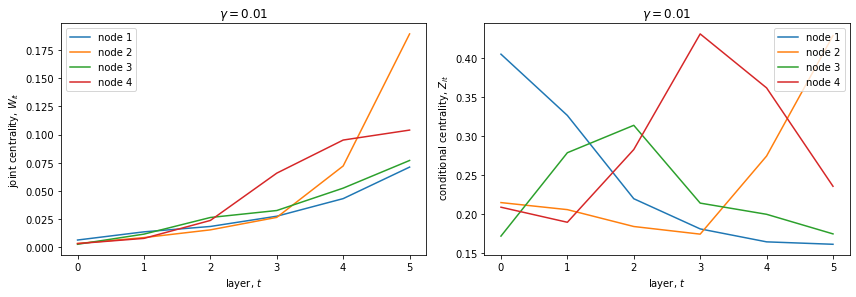

In [58]:
gamma = .01
At2 = directed_chain(len(M),gamma).T # transpose reverses the interlayer edge direction

joints2 = supraCentrality(M,At2,omega,centrality_function)
marginals2,conditionals2 = get_marginal_and_conditional(joints2)
f1,ax = plot_joint_conditional_centralities(joints2,conditionals2)
ax[0].set_title('$\gamma='+str(gamma)+'$')
ax[1].set_title('$\gamma='+str(gamma)+'$')

plt.savefig(fig_folder+'/joints_conditionals_reverse_directed.pdf')